In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
data = pd.read_csv('./My Uber Drives - 2016.csv')

In [4]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
print(data.isnull().sum())
data = data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [6]:
data['START_DATE'] = pd.to_datetime(data['START_DATE*'], format="%m/%d/%Y %H:%M")
data['END_DATE'] = pd.to_datetime(data['END_DATE*'], format="%m/%d/%Y %H:%M")

#data['HOUR'] = [x.hour for x in data['START_DATE*']]
data['HOUR'] = pd.DatetimeIndex(data['START_DATE*']).hour
data['DAY']= pd.DatetimeIndex(data['START_DATE*']).day
data['MONTH']= pd.DatetimeIndex(data['START_DATE*']).month
#data['WEEKDAY']= [calendar.day_name[x.dayofweek] for x in data['START_DATE*']]
data['DAY_OF_WEEK' ] = pd.DatetimeIndex(data['START_DATE*']).dayofweek
#data['WEEKDAY']= [calendar.day_name[pd.DatetimeIndex(data['START_DATE*']).dayofweek]

In [7]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,END_DATE,HOUR,DAY,MONTH,DAY_OF_WEEK
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21,1,1,4
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20,2,1,5
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17,5,1,1
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14,6,1,2
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,17,6,1,2


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

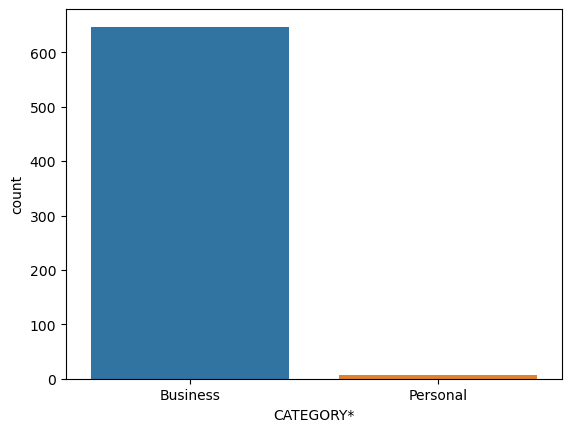

In [8]:
sns.countplot(x='CATEGORY*',data=data)

<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

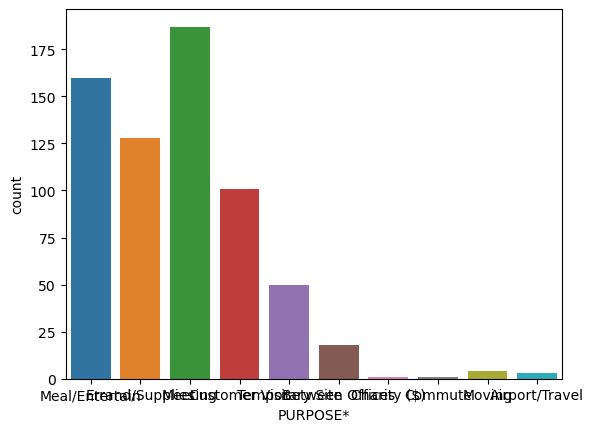

In [9]:
sns.countplot(x='PURPOSE*',data=data)

<AxesSubplot:ylabel='Frequency'>

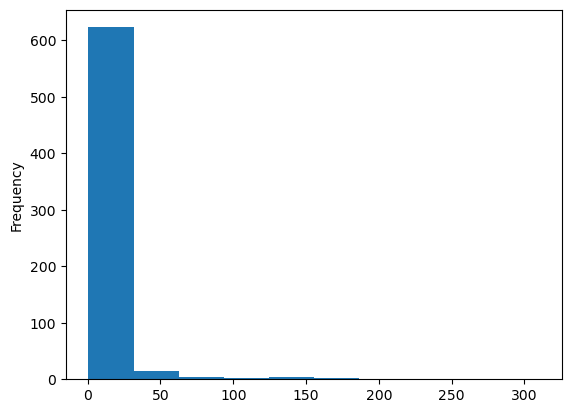

In [10]:
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips VS hours')

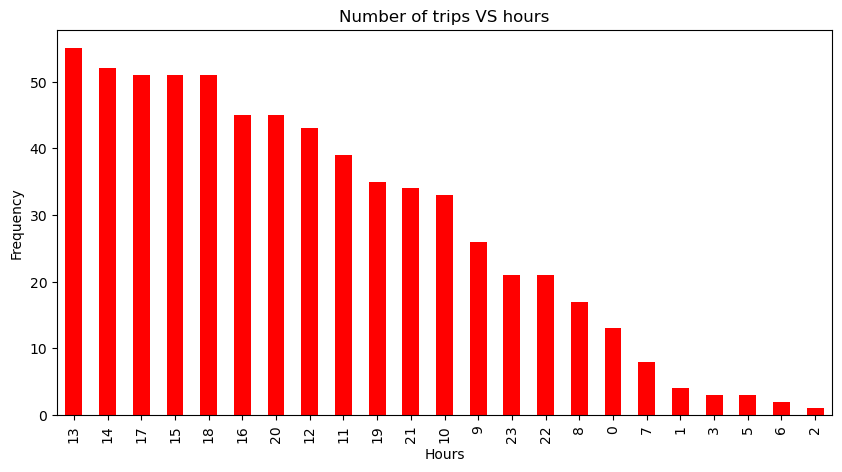

In [11]:
hours = data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel("Frequency")
plt.title('Number of trips VS hours')

Text(0, 0.5, 'Frequency')

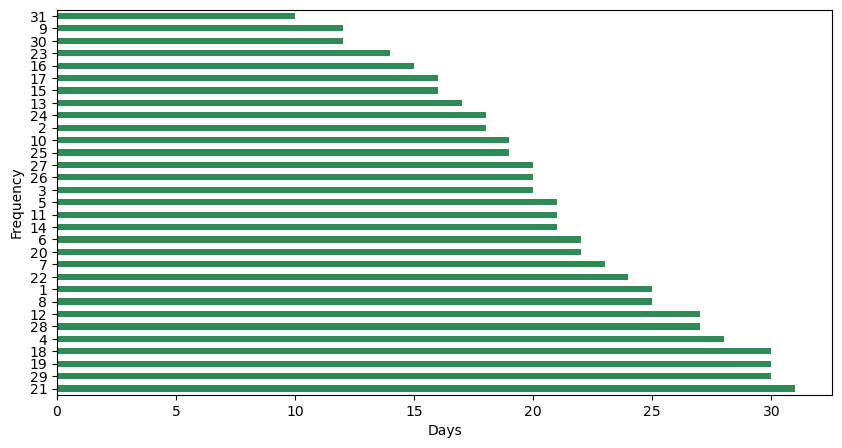

In [12]:
days = data['DAY'].value_counts()
days.plot(kind='barh',color='seagreen',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Number of trips VS months')

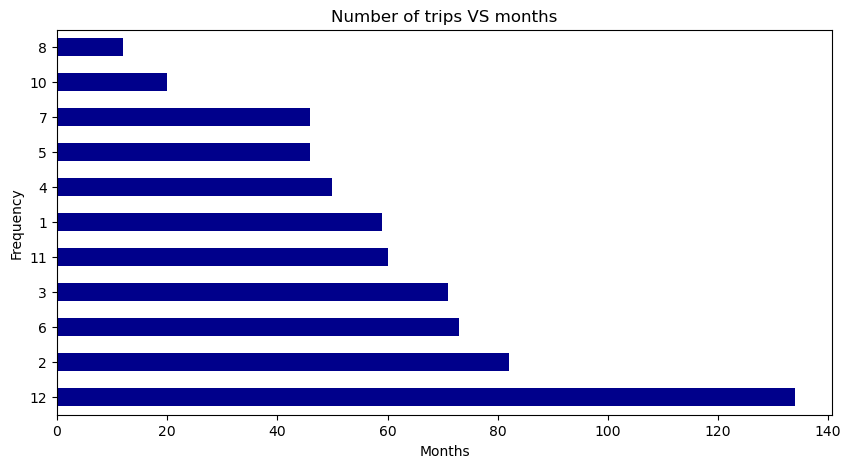

In [13]:
months = data['MONTH'].value_counts()
months.plot(kind='barh',color='darkblue',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips VS months')

Text(0.5, 1.0, 'Number of trips VS days of december')

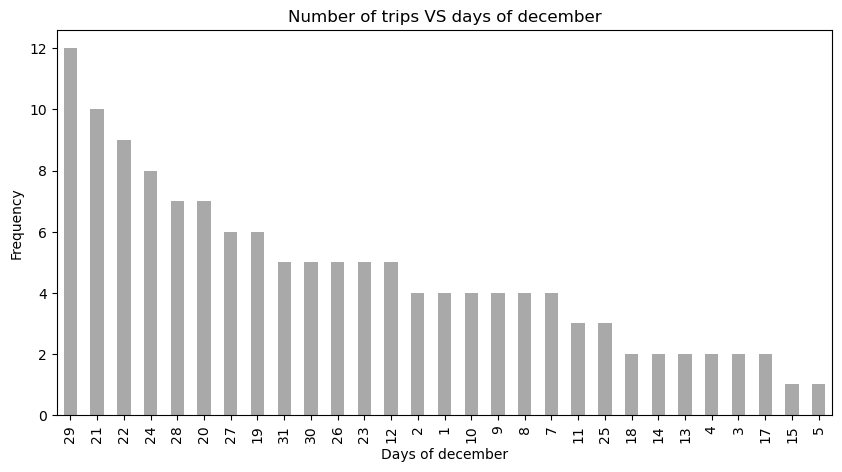

In [14]:
months = data['DAY'][data['MONTH']==12].value_counts()
months.plot(kind='bar',color='darkgrey',figsize=(10,5))
plt.xlabel('Days of december')
plt.ylabel('Frequency')
plt.title('Number of trips VS days of december')

Text(0.5, 1.0, 'Frequency VS Pickup point')

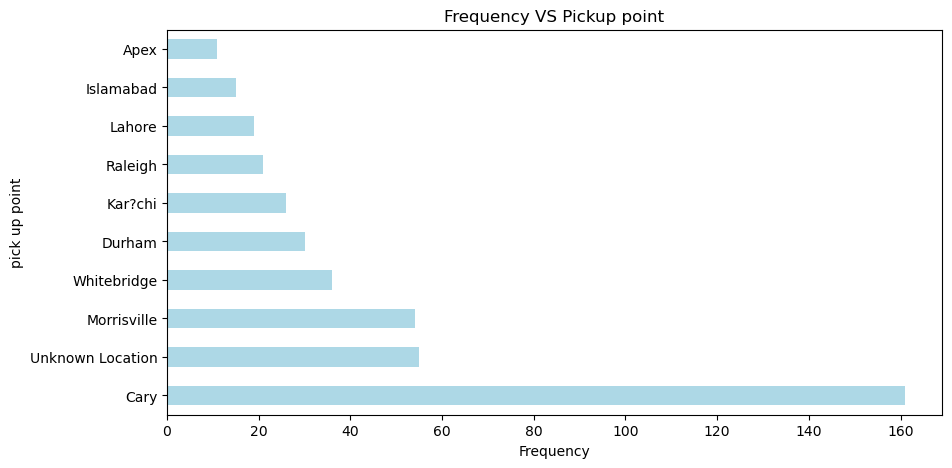

In [15]:
months = data['START*'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.ylabel('pick up point')
plt.xlabel('Frequency')
plt.title('Frequency VS Pickup point')

# Exploratory Data Analysis of Boston Uber Data

In [16]:
import pandas as pd
data =  pd.read_csv('./rideshare_kaggle.csv')

In [19]:
extra_cols = ['apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed',
'windGust', 'apparentTemperatureHigh', 'dewPoint', 'precipIntensityMax', 'apparentTemperatureMax', 
              'cloudCover', 'moonPhase', 'windGustTime', 'visibility', 'temperatureHighTime', 'temperatureLowTime',
            
              'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMinTime',
              'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
              'windBearing', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'uvIndexTime']
data=data.drop(extra_cols, axis=1)

In [20]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperature,short_summary,long_summary,precipProbability,temperatureHigh,temperatureLow,icon,pressure,temperatureMin,temperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,42.34,Mostly Cloudy,Rain throughout the day.,0.0,43.68,34.19,partly-cloudy-night,1021.98,39.89,43.68
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,43.58,Rain,"Rain until morning, starting again in the eve...",1.0,47.30,42.10,rain,1003.97,40.49,47.30
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,38.33,Clear,Light rain in the morning.,0.0,47.55,33.10,clear-night,992.28,35.36,47.55
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,34.38,Clear,Partly cloudy throughout the day.,0.0,45.03,28.90,clear-night,1013.73,34.67,45.03
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0,42.18,36.71,partly-cloudy-night,998.36,33.10,42.18


Text(0.5, 1.0, 'Number of trips VS hours')

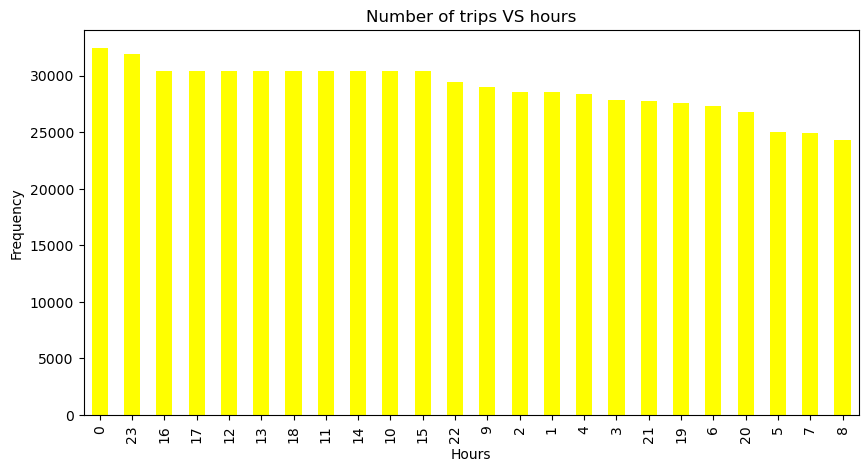

In [21]:
hours = data['hour'].value_counts()
hours.plot(kind='bar',color='yellow',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel("Frequency")
plt.title('Number of trips VS hours')

In [22]:
day_week = [calendar.day_name[x.dayofweek] for x in pd.to_datetime(data['datetime'], format='%Y/%m/%d %H:%M:%S')]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips VS Days')

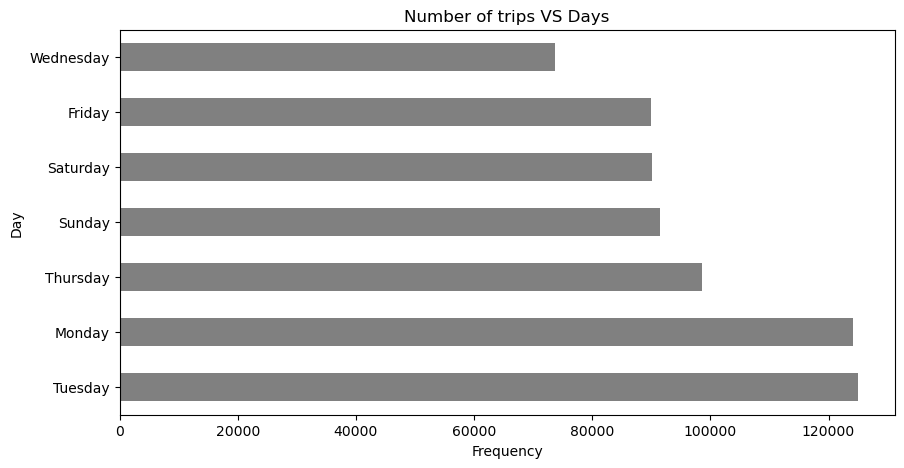

In [23]:
days = day_week.value_counts()
days.plot(kind='barh',color='grey',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of trips VS Days')

Text(0.5, 1.0, 'Number of trips VS Months')

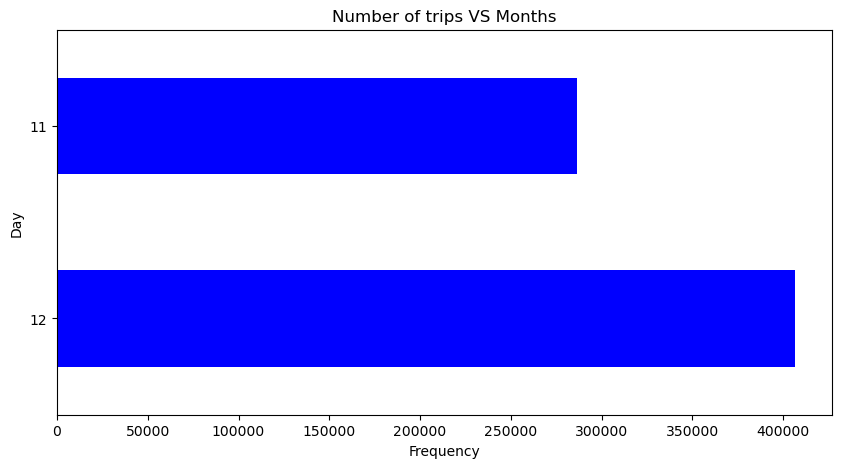

In [24]:
months = data['month'].value_counts()
months.plot(kind='barh',color='blue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of trips VS Months')

Text(0.5, 1.0, 'Number of trips VS days of december')

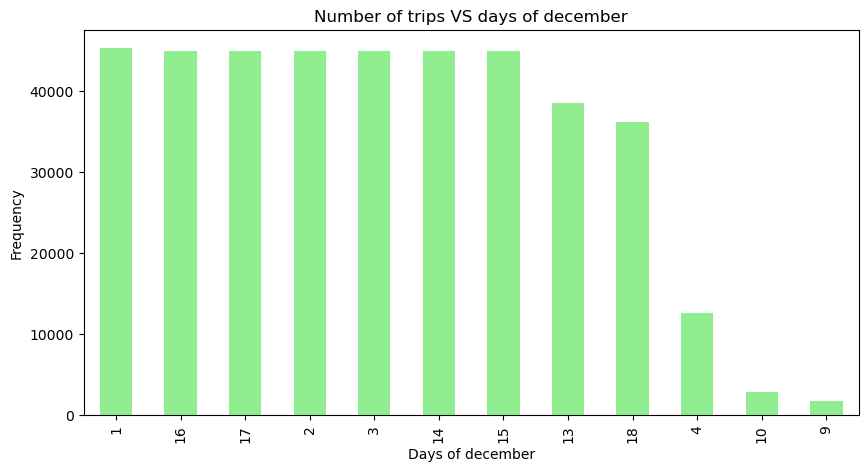

In [25]:
months = data['day'][data['month']==12].value_counts()
months.plot(kind='bar',color='lightgreen',figsize=(10,5))
plt.xlabel('Days of december')
plt.ylabel('Frequency')
plt.title('Number of trips VS days of december')

Text(0.5, 1.0, 'Frequency VS Pickup point')

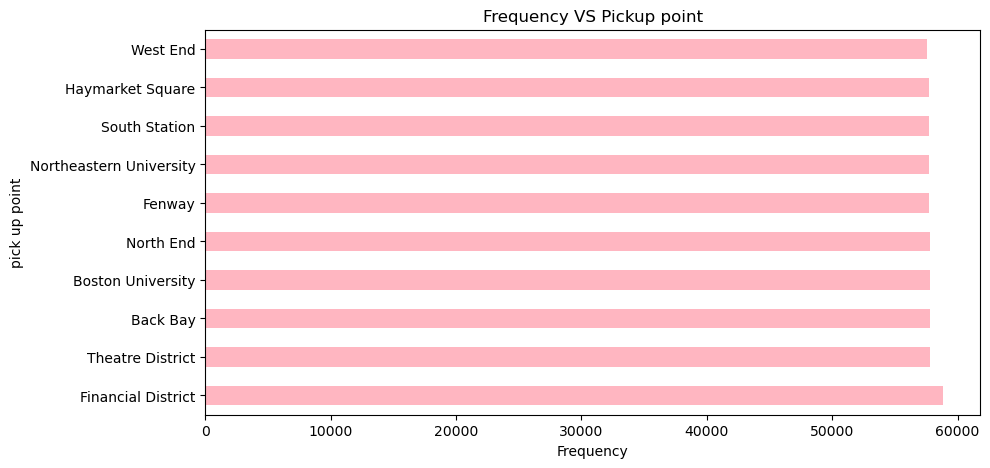

In [26]:
months = data['source'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightpink',figsize=(10,5))
plt.ylabel('pick up point')
plt.xlabel('Frequency')
plt.title('Frequency VS Pickup point')

Text(0.5, 1.0, 'Frequency VS End point')

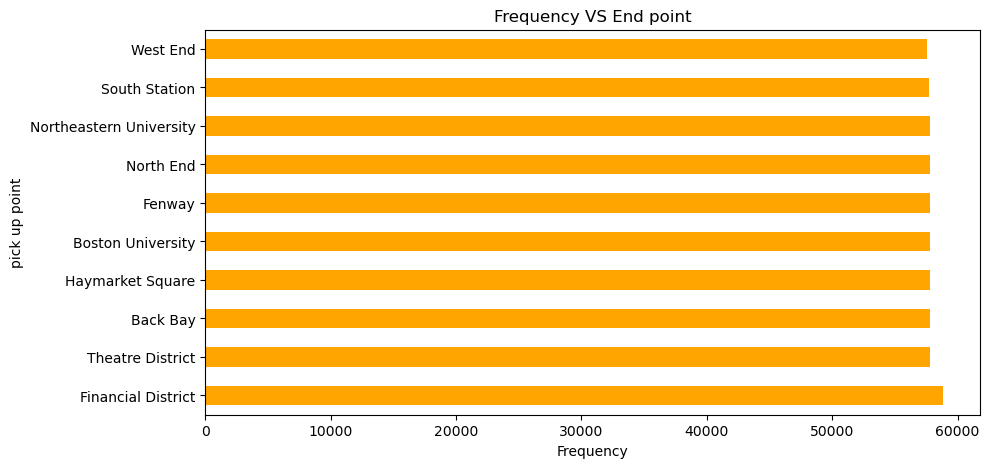

In [27]:
months = data['destination'].value_counts().nlargest(10)
months.plot(kind='barh',color='orange',figsize=(10,5))
plt.ylabel('pick up point')
plt.xlabel('Frequency')
plt.title('Frequency VS End point')

<AxesSubplot:xlabel='name', ylabel='count'>

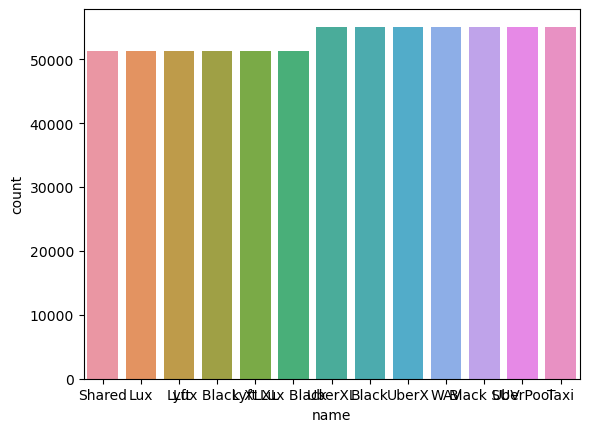

In [28]:
sns.countplot(x='name',data=data)
# types of Uber cabs do people prefer in Boston

# End-to-End Predictive Analysis for Uber Price Prediction using Machine Learning

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['id']= label_encoder.fit_transform(data['id'])
data['datetime']= label_encoder.fit_transform(data['datetime'])
data['timezone']= label_encoder.fit_transform(data['timezone'])
data['destination']= label_encoder.fit_transform(data['destination'])
data['product_id']= label_encoder.fit_transform(data['product_id'])
data['short_summary']= label_encoder.fit_transform(data['short_summary'])
data['long_summary']= label_encoder.fit_transform(data['long_summary'])
data['name']= label_encoder.fit_transform(data['name'])

In [31]:
print("Class mapping of Name:")
for i, item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

Class mapping of Name:
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [32]:
data['source']=label_encoder.fit_transform(data['source'])
print("Class mapping of Source:")
for i, item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

Class mapping of Source:
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [33]:
data['icon']=label_encoder.fit_transform(data['icon'])
print("Class mapping of Icon:")
for i, item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

Class mapping of Icon:
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [34]:
data['cab_type']=label_encoder.fit_transform(data['cab_type'])
print("Class mapping of cab_type:")
for i, item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

Class mapping of cab_type:
Lyft --> 0
Uber --> 1


In [36]:
len(data[data['cab_type']==1])

385663

In [39]:
x = data[data['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data[data['cab_type']==1]['price']



In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

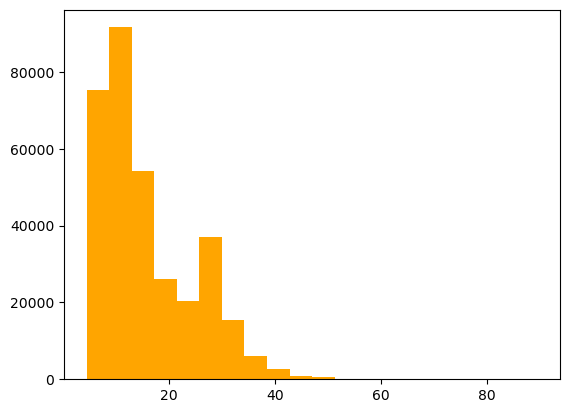

In [57]:
plt.hist(y,bins=20,color='orange')
plt.show()

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [72]:
def train_test_models (X_train, y_train, X_test, y_test):
    print("Linear Regression...")

    lr_model = LinearRegression()
    lr_model = lr_model.fit(X_train, y_train)
    print(lr_model.score(X_test, y_test))
    
    print("Decision Tree...")
    dt_model = DecisionTreeRegressor(random_state= 8, max_depth=10)
    dt_model.fit(X_train, y_train)
    print(dt_model.score(X_test, y_test)) 

    print("Random Forest...")
    random_forest = RandomForestRegressor(n_estimators = 20, random_state = 0)
    randon_forest.fit(X_train, y_train)
    print (random_forest.score (X_test, y_test))

    print("GBM...")
    gbe = ensemble.GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
    gbm.fit(X_train, y_train)
    print(gbe.score (X_test, y_test))
    
    return [lr_model, dt_model, random_forest, gbm]

In [73]:
def feature_eliminate(trained_model, X, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)

    rfe = rfe.fit(X, y)

    X_new = X[X.columns[rfe.support_]]
    X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size = 0.2,random_state = 0)

    new_fit = trained_model.fit(X_train, y_train)
    print(new_fit.score (X_test, y_test))

In [ ]:
model_list = train_test_models(X_train, y_train, X_test, y_test)
n_features [5, 10, 15, 20]
for model in model_list:
    for nf in n_features:
        print (f" {model}->{nf} features")
        feature_eliminate(model, x, y, nf)